<a href="https://colab.research.google.com/github/ColeJ1115/NYC-Travel/blob/main/NYC_Analysis_JFK_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dbnb  = pd.read_csv('Airbnb_Cleaned.csv')

In [ ]:
dbnb['total_cost'] = dbnb['price'] * dbnb['minimum_nights']

In [ ]:
dbnb

,Unnamed: 0,neighbourhood_group,room_type,price,minimum_nights,availability_365,total_cost
0,0,Brooklyn,Private room,149,1,365,149
1,1,Manhattan,Entire home/apt,225,1,355,225
2,2,Manhattan,Private room,150,3,365,450
3,3,Brooklyn,Entire home/apt,89,1,194,89
4,4,Manhattan,Entire home/apt,80,10,0,800
...,...,...,...,...,...,...,...
48890,48890,Brooklyn,Private room,70,2,9,140
48891,48891,Brooklyn,Private room,40,4,36,160
48892,48892,Manhattan,Entire home/apt,115,10,27,1150
48893,48893,Manhattan,Shared room,55,1,2,55


In [ ]:
dbnb.to_csv('Airbnb_Updated.csv')

**Cleaning the JFK Airline Dataset**

In [ ]:
jfk= pd.read_csv('JFK-SUPREME Dataset.csv')

In [ ]:
jfk.head()

,Carrier Code,Date (MM/DD/YYYY),Origin Airport,Actual Arrival Time,Arrival Delay (Minutes),Delay Weather (Minutes)
0,9E,01/01/2022,DTW,9:59,-18,0
1,9E,01/01/2022,RDU,8:26,-18,0
2,9E,01/01/2022,DTW,14:07,-16,0
3,9E,01/01/2022,CVG,17:50,3,0
4,9E,01/01/2022,BNA,13:04,10,0


In [ ]:
jfk['Date'] = jfk['Date (MM/DD/YYYY)']

In [ ]:
jfk['Date'] = pd.to_datetime(jfk['Date'])

In [ ]:
jfk['Arrival Delay'] = jfk['Arrival Delay (Minutes)']

In [ ]:
jfk['Delay Weather'] = jfk['Delay Weather (Minutes)']

In [ ]:
jfk = jfk.drop(columns = ['Date (MM/DD/YYYY)', 'Arrival Delay (Minutes)', 'Delay Weather (Minutes)'])

In [ ]:
jfk.head()

,Carrier Code,Origin Airport,Actual Arrival Time,Date,Arrival Delay,Delay Weather
0,9E,DTW,9:59,2022-01-01,-18,0
1,9E,RDU,8:26,2022-01-01,-18,0
2,9E,DTW,14:07,2022-01-01,-16,0
3,9E,CVG,17:50,2022-01-01,3,0
4,9E,BNA,13:04,2022-01-01,10,0


In [ ]:
jfk['Carrier'] = jfk['Carrier Code'].str.replace("9E", "Endeavor Air Inc")\
        .str.replace("B6", "JetBlue Airways")\
        .str.replace("YX", "Republic Airline")\
        .str.replace("AS", "Alaska Airlines Inc")\
        .str.replace("AA", "American Airlines Inc")\
        .str.replace("DL", "Delta Airlines Inc")\
        .str.replace("HA", "Hawaiian Airlines Inc")\
        .str.replace("OO", "SkyWest Airlines Inc")\
        .str.replace("UA", "United Airlines Inc")

In [ ]:
jfk.groupby('Carrier').count()

,Carrier Code,Origin Airport,Actual Arrival Time,Date,Arrival Delay,Delay Weather
Carrier,,,,,,
Alaska Airlines Inc,8413,8413,8413,8413,8413,8413
American Airlines Inc,30246,30246,30246,30246,30246,30246
Delta Airlines Inc,55408,55408,55408,55408,55408,55408
Endeavor Air Inc,40862,40862,40862,40862,40862,40862
Hawaiian Airlines Inc,730,730,730,730,730,730
JetBlue Airways,90615,90615,90615,90615,90615,90615
Republic Airline,37534,37534,37534,37534,37534,37534
SkyWest Airlines Inc,4602,4602,4602,4602,4602,4602
United Airlines Inc,1200,1200,1200,1200,1200,1200


In [ ]:
jfk.head()

,Carrier Code,Origin Airport,Actual Arrival Time,Date,Arrival Delay,Delay Weather,Carrier
0,9E,DTW,9:59,2022-01-01,-18,0,Endeavor Air Inc
1,9E,RDU,8:26,2022-01-01,-18,0,Endeavor Air Inc
2,9E,DTW,14:07,2022-01-01,-16,0,Endeavor Air Inc
3,9E,CVG,17:50,2022-01-01,3,0,Endeavor Air Inc
4,9E,BNA,13:04,2022-01-01,10,0,Endeavor Air Inc


In [ ]:
jfk = jfk.drop(columns = ['Carrier Code'])

In [ ]:
jfk['Month'] = pd.DatetimeIndex(jfk['Date']).month

In [ ]:
jfk.groupby('Month').count()

,Origin Airport,Actual Arrival Time,Date,Arrival Delay,Delay Weather,Carrier
Month,,,,,,
1,22001,22001,22001,22001,22001,22001
2,20859,20859,20859,20859,20859,20859
3,23561,23561,23561,23561,23561,23561
4,22824,22824,22824,22824,22824,22824
5,23605,23605,23605,23605,23605,23605
6,22492,22492,22492,22492,22492,22492
7,23086,23086,23086,23086,23086,23086
8,22964,22964,22964,22964,22964,22964
9,22317,22317,22317,22317,22317,22317


In [ ]:
jfk.head()

,Origin Airport,Actual Arrival Time,Date,Arrival Delay,Delay Weather,Carrier,Month
0,DTW,9:59,2022-01-01,-18,0,Endeavor Air Inc,1
1,RDU,8:26,2022-01-01,-18,0,Endeavor Air Inc,1
2,DTW,14:07,2022-01-01,-16,0,Endeavor Air Inc,1
3,CVG,17:50,2022-01-01,3,0,Endeavor Air Inc,1
4,BNA,13:04,2022-01-01,10,0,Endeavor Air Inc,1


In [ ]:
jfk['Actual Arrival Time'] = jfk['Actual Arrival Time'].str.replace('24:00:00', '0:00')\
        .str.replace('00:00:00', '0:00')\
        .str.replace('24:00', '0:00')

In [ ]:
not_delayed = jfk[jfk['Delay Weather'] == 0]

In [ ]:
df = jfk.drop(not_delayed.index)

In [ ]:
df.head()

,Origin Airport,Actual Arrival Time,Date,Arrival Delay,Delay Weather,Carrier,Month
10,BTV,7:47,2022-01-01,27,8,Endeavor Air Inc,1
45,BTV,17:36,2022-01-02,34,24,Endeavor Air Inc,1
73,DTW,14:02,2022-01-02,124,39,Endeavor Air Inc,1
218,MSP,16:11,2023-01-04,314,199,Endeavor Air Inc,1
404,SYR,18:12,2022-01-07,126,12,Endeavor Air Inc,1


In [ ]:
df.groupby('Month')['Delay Weather'].mean()

Month
1     76.524691
2     68.334951
3     62.571429
4     80.205742
5     74.404651
6     85.727019
7     82.889952
8     77.791798
9     76.371212
10    60.843137
11    55.658333
12    74.384236
Name: Delay Weather, dtype: float64

<Axes: xlabel='Month'>

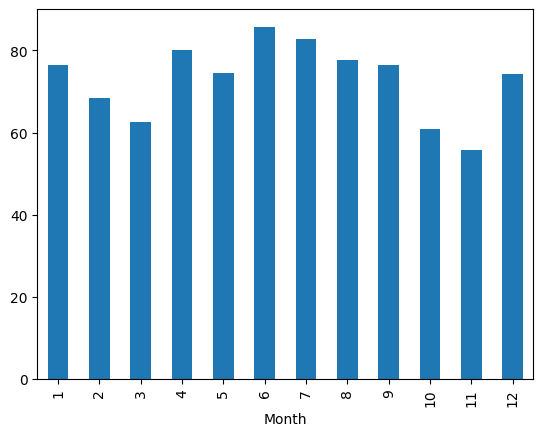

In [ ]:
df.groupby('Month')['Delay Weather'].mean().plot(kind = 'bar')

In [ ]:
df.groupby('Month')['Arrival Delay'].mean()

Month
1     117.253086
2     110.572816
3     103.065476
4     118.062201
5     112.497674
6     130.576602
7     125.583732
8     117.593060
9     109.613636
10     84.303922
11     91.283333
12    120.088670
Name: Arrival Delay, dtype: float64

<Axes: xlabel='Month'>

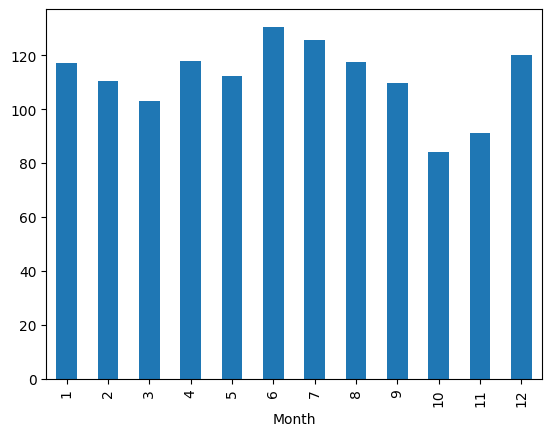

In [ ]:
df.groupby('Month')['Arrival Delay'].mean().plot(kind = 'bar')

In [ ]:
df.groupby('Carrier')['Delay Weather'].mean()

Carrier
Alaska Airlines Inc       74.359649
American Airlines Inc     53.806604
Delta Airlines Inc        65.222707
Endeavor Air Inc         110.289773
Hawaiian Airlines Inc     88.200000
JetBlue Airways           79.158455
Republic Airline          69.087940
SkyWest Airlines Inc      85.502075
Name: Delay Weather, dtype: float64

<Axes: xlabel='Carrier'>

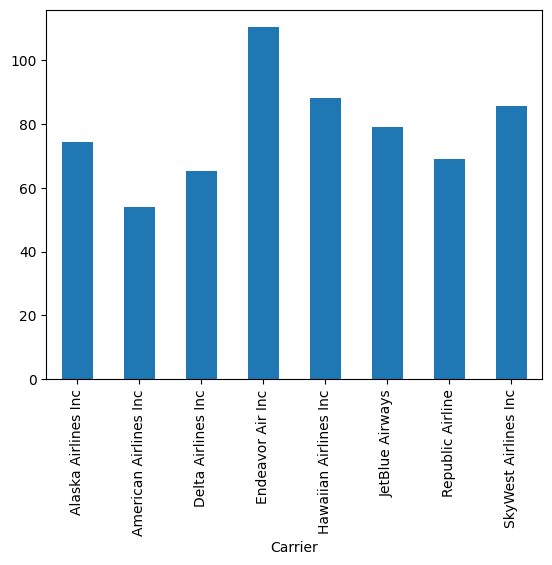

In [ ]:
df.groupby('Carrier')['Delay Weather'].mean().plot(kind = 'bar')

In [ ]:
jfk.to_csv('JFK_CLEANED_UPDATE2.csv')

In [ ]:
df.to_csv('JFK_DELAYED_UPDATE2.csv')